In [57]:
import keras
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

### Step 1: Load the att_faces dataset.
A data loading function is already provided in loader.py.  It uses the first 8 images for each identity as training images; the 9th image for validation, and the 10th image for testing.  The images are downsampled and padded to have size 28x28 (same as MNIST).

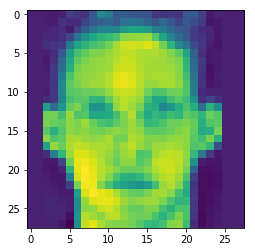

In [58]:
from loader import load_att_faces
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_att_faces()

plt.imshow(x_train[0])
plt.show()


### Step 2: Calculate the average intensity for the training images and subtract it from all images.

In [59]:
average = 0;
sumation = 0;
count = 0;
for imageNum in range(320):
    for row in range(28):
        for column in range(28):
            sumation += x_train[imageNum][row][column]
            count += 1

average = sumation / count
print('Average intensity: {}'.format(sumation / count))

#subtract from training
for imageNum in range(320):
    for row in range(28):
        for column in range(28):
            x_train[imageNum][row][column] -= average
            
#subtract from verify
for imageNum in range(40):
    for row in range(28):
        for column in range(28):
            x_val[imageNum][row][column] -= average
            
#subtract from test
for imageNum in range(40):
    for row in range(28):
        for column in range(28):
            x_test[imageNum][row][column] -= average

Average intensity: 0.39639122339509897


### Step 3: Set up a LeNet-style neural network for multi-class classification.

The model should have these layers in order:

* 20 5x5 Convolutions
* 2x2 Max Pooling with stride of 2
* 50 5x5 Convolutions
* 2x2 Max Pooling with stride of 2
* Fully connected layer: 512 outputs with ReLU activation
* Fully connected layer: 40 outputs (one per identity class) with Softmax activation

        print(model.summary())

will print a text summary of the model.

In [60]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape

x_in = Input(x_train.shape[1:])
x = Reshape((x_train.shape[1],x_train.shape[2],1))(x_in) # Add an extra dimension to be compatible with Conv2D
# add more layers here
x = Conv2D(20, (5, 5), padding='same')(x)
x = MaxPooling2D((2, 2), 2)(x)
x = Conv2D(50, (5, 5), padding='same')(x)
x = MaxPooling2D((2, 2), 2)(x)
x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(40,activation='softmax')(x)
model = Model(inputs=x_in,outputs=x)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2450)              0         
__________

### Step 4: Train the model on the training data.
Use the 'categorical_crossentropy' loss from Keras -- this is the cross-entropy loss for multi-class classification with Softmax.

Use the SGD optimizer with a learning rate of 1e-2, 60 epochs, and a batch size of 32.

Pass the validation data as well and tell the model to compute the 'categorical_accuracy' metric.

In [61]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['categorical_accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=60,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 320 samples, validate on 40 samples
Epoch 1/60
320/320 [==============================] - 0s - loss: 3.6893 - categorical_accuracy: 0.0344 - val_loss: 3.6873 - val_categorical_accuracy: 0.0500
Epoch 2/60
320/320 [==============================] - 0s - loss: 3.6842 - categorical_accuracy: 0.0406 - val_loss: 3.6831 - val_categorical_accuracy: 0.0500
Epoch 3/60
320/320 [==============================] - 0s - loss: 3.6794 - categorical_accuracy: 0.0438 - val_loss: 3.6791 - val_categorical_accuracy: 0.0500
Epoch 4/60
320/320 [==============================] - 0s - loss: 3.6750 - categorical_accuracy: 0.0469 - val_loss: 3.6750 - val_categorical_accuracy: 0.0500
Epoch 5/60
320/320 [==============================] - 0s - loss: 3.6702 - categorical_accuracy: 0.0531 - val_loss: 3.6708 - val_categorical_accuracy: 0.0750
Epoch 6/60
320/320 [==============================] - 0s - loss: 3.6656 - categorical_accuracy: 0.0625 - val_loss: 3.6666 - val_categorical_accuracy: 0.0750
Epoch 7/60
32

320/320 [==============================] - 0s - loss: 0.2435 - categorical_accuracy: 0.9938 - val_loss: 0.4607 - val_categorical_accuracy: 0.9000
Epoch 53/60
320/320 [==============================] - 0s - loss: 0.2361 - categorical_accuracy: 0.9781 - val_loss: 0.4755 - val_categorical_accuracy: 0.9250
Epoch 54/60
320/320 [==============================] - 0s - loss: 0.2129 - categorical_accuracy: 0.9812 - val_loss: 0.4142 - val_categorical_accuracy: 0.8750
Epoch 55/60
320/320 [==============================] - 0s - loss: 0.1658 - categorical_accuracy: 0.9938 - val_loss: 0.3588 - val_categorical_accuracy: 0.9500
Epoch 56/60
320/320 [==============================] - 0s - loss: 0.1484 - categorical_accuracy: 0.9938 - val_loss: 0.3286 - val_categorical_accuracy: 0.9500
Epoch 57/60
320/320 [==============================] - 0s - loss: 0.1477 - categorical_accuracy: 0.9938 - val_loss: 0.3631 - val_categorical_accuracy: 0.9000
Epoch 58/60
320/320 [==============================] - 0s - loss

### Step 5: Plot the progress of loss and accuracy during training.
The mnist demo script shows an example of how to do this.

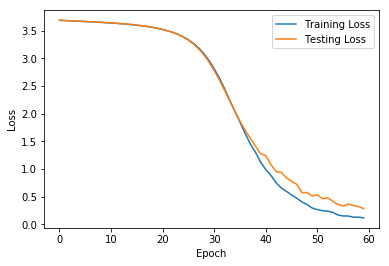

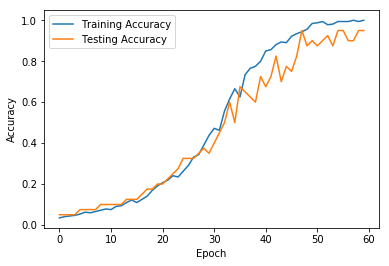

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Step 6: Calculate accuracy on the training, validation and testing data.
Keras function model.evaluate() will calculate the accuracy for you, if you used the 'categorical_accuracy' as indicated above.

You may not get exactly the same accuracy values as provided in the example output.  This is because the network is initialized randomly.

In [65]:
trash, train = model.evaluate(x_train, y_train)
trash, val = model.evaluate(x_val, y_val)
trash, test = model.evaluate(x_test, y_test)

print(); print()
print("Training: ", train * 100, "%")
print("Validation: ", val * 100, "%")
print("Testing: ", test * 100, "%")

32/40 [=======================>......] - ETA: 0s0s

Training:  100.0 %
Validation:  95.0 %
Testing:  95.0 %
